In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
file = "dpt2021_csv.zip"
if(!file.exists(file)){
  download.file("https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2021_csv.zip",
	destfile=file)
}
unzip(file)

In [3]:
%%bash
md5sum dpt2021.csv

f18a7d627883a0b248a0d59374f3bab7  dpt2021.csv


In [4]:
%%R
library(tidyverse)
FirstNames <- read_delim("dpt2021.csv",delim=";")

Rows: 3784673 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): preusuel, annais, dpt
dbl (2): sexe, nombre

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [44]:
%%R
FirstNames  %>%filter(preusuel=="BERTRAND") %>%count(annais)

# A tibble: 110 × 2
   annais     n
   <chr>  <int>
 1 1900       6
 2 1901       9
 3 1902       8
 4 1903       7
 5 1904       7
 6 1905      10
 7 1906      13
 8 1907      11
 9 1908       8
10 1909      10
# … with 100 more rows


In [80]:
%%R
bertand_analysis = FirstNames  %>%filter(preusuel=="BERTRAND") %>%count(annais)
bertand_analysis

# A tibble: 110 × 2
   annais     n
   <chr>  <int>
 1 1900       6
 2 1901       9
 3 1902       8
 4 1903       7
 5 1904       7
 6 1905      10
 7 1906      13
 8 1907      11
 9 1908       8
10 1909      10
# … with 100 more rows


# A tibble: 1 × 0


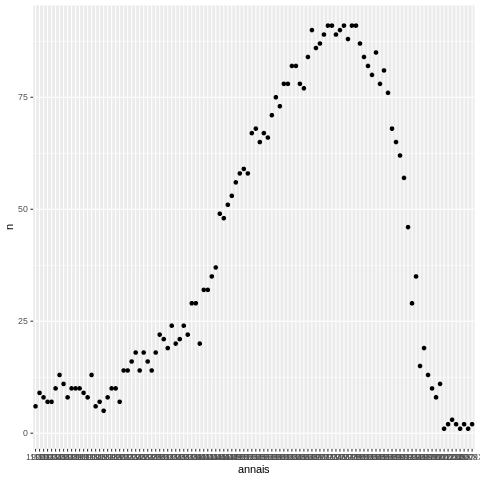

In [67]:
%%R
ggplot(bertand_analysis, aes(x = annais, y = n)) + geom_point()

## Visualizing frequency of name Bertand over the years

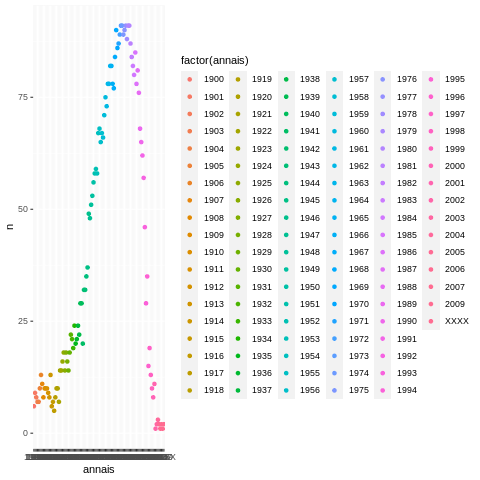

In [69]:
%%R
ggplot(bertand_analysis, aes(x = annais, y = n, color=factor(annais)))+ geom_point()

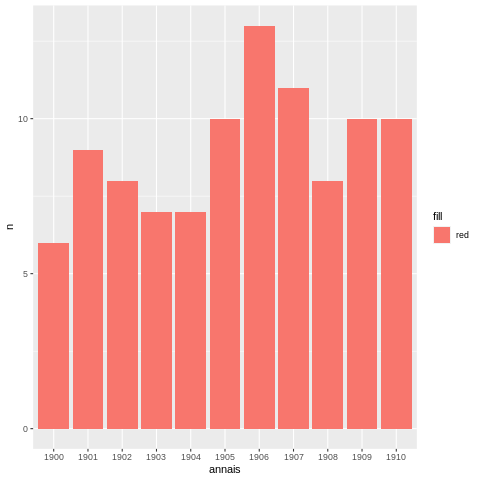

In [91]:
%%R
bertand_analysis_sliced_1910 = FirstNames  %>%filter(preusuel=="BERTRAND", annais<=1910) %>%count(annais)
bertand_analysis_sliced_1910
ggplot(bertand_analysis_sliced_1910) + geom_bar(aes(x=annais, y=n, fill='red'), stat="identity")

No summary function supplied, defaulting to `mean_se()`


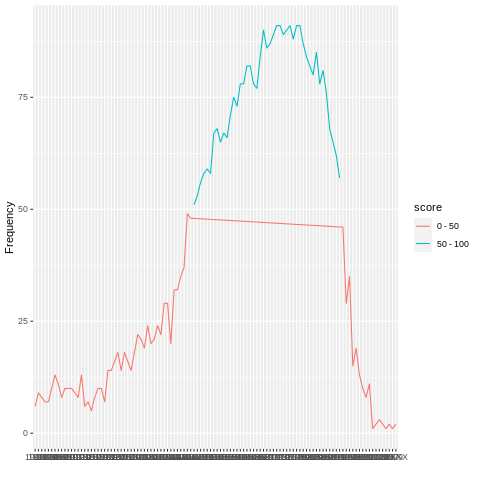

In [98]:
%%R
ggplot(bertand_analysis, aes(x=factor(annais),y=n, group=(n>50)))+
  stat_summary(aes(color=(n>50)), geom="line")+
  scale_color_discrete("score",labels=c("0 - 50","50 - 100"))+
  labs(x="",y="Frequency")